In [1]:
from scipy.spatial.distance import euclidean, pdist, squareform
from scipy.stats.mstats import zscore
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
#from geopy import geocoders 
import scipy, json, csv, time
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('baseline_def_kaggle.csv')
df.head()

,Unnamed: 0,open,high,low,close,volume,market,close_ratio,spread,prevClose,7 Day Rolling Mean,7 Day SD,percentChange,isEvent based on 2SD,Naive Percent Event
0,0,763.28,777.51,713.60,735.07,46862700.0,8.955395e+09,0.3359,63.91,735.07,755.982857,24.982272,0.000000,0,False
1,1,737.98,747.06,705.35,727.83,32505800.0,8.869919e+09,0.5390,41.71,735.07,755.982857,24.982272,-0.009849,0,False
2,2,728.05,748.61,714.44,745.05,19011300.0,9.082104e+09,0.8958,34.17,727.83,755.982857,24.982272,0.023659,0,False
3,3,741.35,766.60,740.24,756.13,20707700.0,9.217168e+09,0.6028,26.36,745.05,755.982857,24.982272,0.014871,0,False
4,4,760.32,760.58,738.17,754.01,20897300.0,9.191325e+09,0.7068,22.41,756.13,755.982857,24.982272,-0.002804,0,False


In [3]:
data = df[['close', 'volume', 'market', 'spread', 'percentChange']]
#data = df[['close', 'percentChange', 'market']]
data.head()

,close,volume,market,spread,percentChange
0,735.07,46862700.0,8.955395e+09,63.91,0.000000
1,727.83,32505800.0,8.869919e+09,41.71,-0.009849
2,745.05,19011300.0,9.082104e+09,34.17,0.023659
3,756.13,20707700.0,9.217168e+09,26.36,0.014871
4,754.01,20897300.0,9.191325e+09,22.41,-0.002804


In [24]:
def baseline_colors(x):
    if x:
        return 'Firebrick'
    else:
        return 'ForestGreen'

colors = df['isEvent based on 2SD'].apply(baseline_colors).values

In [25]:
# Standardization
# data[:] = data[:].apply(zscore)

# Normalization
data[:] = MinMaxScaler().fit_transform(data[:])

# Quantiles
# data[:] = QuantileTransformer(n_quantiles=100, output_distribution="normal", copy=True).fit_transform(data[:])

# Manual Z-Score Pruning
# data = data.loc[(np.abs(scipy.stats.zscore(data)) < 2.0).all(axis=1)]
# data[:] = MinMaxScaler().fit_transform(data[:])


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer(key, value)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return self._setitem_slice(indexer, value)


In [6]:
spatial_distance = "euclidean" # Euclidean Distance
# spatial_distance = "minkowski" # Minkowski Distance
# spatial_distance = "cityblock" # Manhattan Distance
# spatial_distance = "seuclidean" # Standardized Euclidean Distance
# spatial_distance = "cosine" # Cosine Distance

dists = pdist(data, spatial_distance)
d = pd.DataFrame(squareform(dists))
d.head()

,0,1,2,3,4,5,6,7,8,9,...,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798
0,0.000000,0.021920,0.051526,0.033378,0.011882,0.050893,0.086742,0.044434,0.107697,0.186250,...,0.512016,0.403250,0.358647,0.345553,0.410561,0.403897,0.391318,0.347907,0.491090,0.387841
1,0.021920,0.000000,0.072262,0.053450,0.015992,0.071189,0.107966,0.065363,0.128957,0.207735,...,0.507006,0.409216,0.354140,0.346907,0.401410,0.410450,0.387204,0.351289,0.504016,0.390470
2,0.051526,0.072262,0.000000,0.019051,0.057116,0.003972,0.036090,0.008981,0.057163,0.136075,...,0.535143,0.398752,0.378629,0.351583,0.443730,0.400590,0.412526,0.349343,0.469913,0.391115
3,0.033378,0.053450,0.019051,0.000000,0.038111,0.017744,0.055010,0.013294,0.076015,0.154988,...,0.527187,0.400023,0.370672,0.348468,0.432137,0.402114,0.404895,0.348080,0.478177,0.389373
4,0.011882,0.015992,0.057116,0.038111,0.000000,0.055770,0.092993,0.050390,0.113963,0.192905,...,0.512995,0.405945,0.357993,0.346241,0.410452,0.408013,0.392119,0.349454,0.496744,0.389395


In [27]:
tsne_inp = np.array(d)
model = TSNE(n_components=3, n_iter=5000, perplexity=30.0)
tsne_out = model.fit_transform(tsne_inp)  
result = tsne_out.tolist()

In [18]:
%matplotlib notebook

In [22]:
#fig = plt.figure()
#ax = fig.add_subplot(111, projection="3d")
#ax.scatter(xs=tsne_out.T[0], ys=tsne_out.T[1], zs=tsne_out.T[2], s=2, c='black')
#plt.scatter(tsne_out.T[0], tsne_out.T[1])

<IPython.core.display.Javascript object>


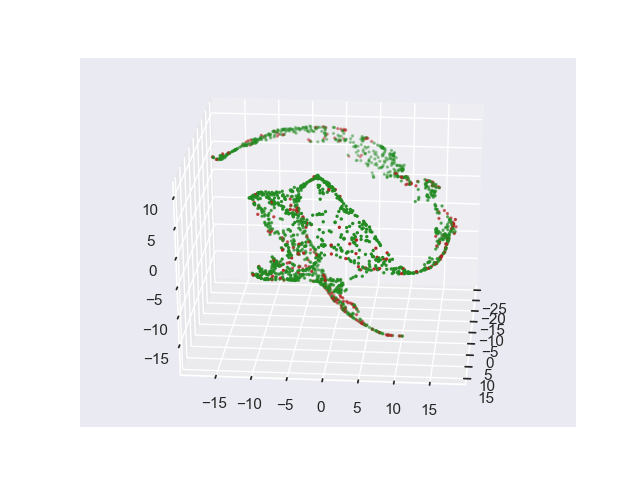

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs=tsne_out.T[0], ys=tsne_out.T[1], zs=tsne_out.T[2], s=2, c=colors)
#plt.scatter(tsne_out.T[0], tsne_out.T[1], s=2, c=colors)

In [11]:
idx = [i[0] for i in np.argwhere(colors=='Firebrick')]
data.iloc[idx] # Rows Where An Event Occurs

,close,volume,market,spread,percentChange
11,0.032294,0.003291,0.022724,0.039595,0.113714
31,0.030710,0.001945,0.021784,0.032818,0.178496
55,0.019568,0.001848,0.013779,0.017171,0.224379
66,0.025346,0.003910,0.018153,0.034399,0.871541
90,0.015173,0.002490,0.010736,0.026352,0.049103
104,0.009684,0.002224,0.006689,0.020346,0.078234
105,0.012570,0.002505,0.008868,0.018852,0.784984
108,0.014529,0.002008,0.010362,0.014929,0.688652
109,0.017469,0.001959,0.012586,0.015679,0.722657
320,0.012705,0.001801,0.010094,0.014774,0.783255


<IPython.core.display.Javascript object>


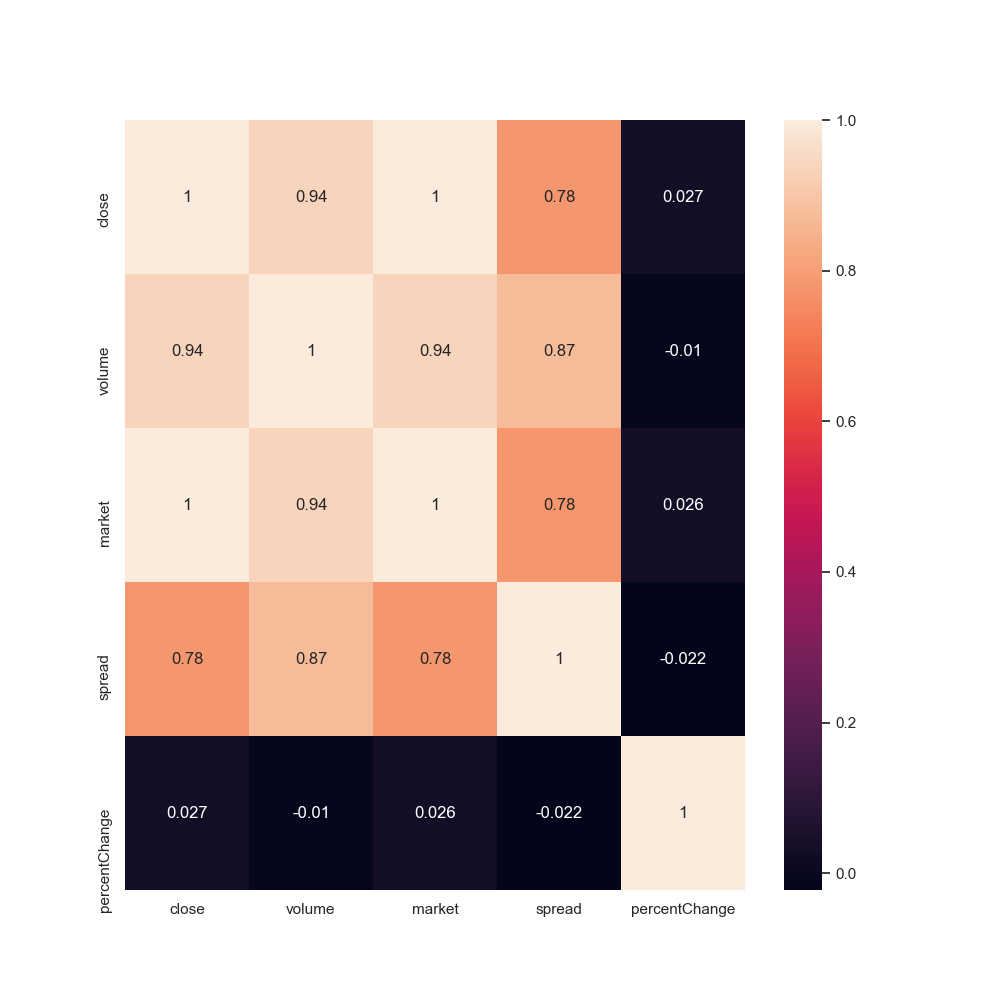

In [12]:
import seaborn as sns; sns.set()
correlations = pd.DataFrame(data=data).corr()
ax = plt.figure(figsize=(10,10))
sns.heatmap(correlations, annot=True)

In [13]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
correlations = pd.DataFrame(data=data).corr()
#feature_names = ['close', 'percentChange', 'market']
feature_names = ['close', '7 Day Rolling Mean', '7 Day SD', 'volume']

pca = PCA(n_components=len(feature_names))
pca.fit(data)
reduced_data = pca.transform(data)
reduced_data = pd.DataFrame(reduced_data)

In [14]:
def pca_results(good_data, pca):
    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (10,10))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [15]:
def vis_PCA3D(color, colormap, title):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection="3d")
    # scatterplot of the reduced data    
    ax.scatter(xs=reduced_data[0], ys=reduced_data[1], zs=reduced_data[2], s=5, alpha=0.5, c=color, cmap=colormap)

    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.plot([0,arrow_size*v[0]], [0,arrow_size*v[1]], zs=[0,arrow_size*v[2]])
        ax.text(v[0]*text_pos, v[1]*text_pos, v[2]*text_pos, df.columns[i], color="black", ha="center", va="center", fontsize=10)

    ax.set_title("PC plane with original feature projections.", fontsize=16);
    ax
    #plt.savefig("/vectors3DPer{0}.png".format(title), dpi = 300)